<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# %%
# Display column names
print("Column Names:")
print(df.columns)

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

# Display summary information about the dataset
print("\nSummary Information:")
df.info()

# Display basic statistical summary for numerical columns
print("\nStatistical Summary:")
print(df.describe())

Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

Statisti

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
# %%
# Step 3: Handle missing data
# Check the number of missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])
# Option 1: Remove rows with missing values (if appropriate)
# df_cleaned = df.dropna()
# Option 2: Impute missing values for specific columns (example)
# For numerical columns, fill missing values with the median
# for col in df.select_dtypes(include=['float64', 'int64']).columns:
#     median_value = df[col].median()
#     df[col].fillna(median_value, inplace=True)
# For categorical columns, fill missing values with the mode
# for col in df.select_dtypes(include=['object']).columns:
#     mode_value = df[col].mode()[0]
#     df[col].fillna(mode_value, inplace=True)
# Choose one of the above options based on your analysis
# For demonstration, let's drop rows with missing values
df_cleaned = df.dropna()
# Verify no missing values remain
print("\nMissing values after handling:")
print(df_cleaned.isnull().sum().sum())

Missing values per column:
RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64

Missing values after handling:
0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here
# %%
# Step 4: Analyze Key Columns
key_columns = ['Employment', 'JobSat', 'YearsCodePro']
for col in key_columns:
    print(f"Value counts for '{col}':")
    print(df_cleaned[col].value_counts(dropna=False))
    print("\n")

Value counts for 'Employment':
Series([], Name: count, dtype: int64)


Value counts for 'JobSat':
Series([], Name: count, dtype: int64)


Value counts for 'YearsCodePro':
Series([], Name: count, dtype: int64)




### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


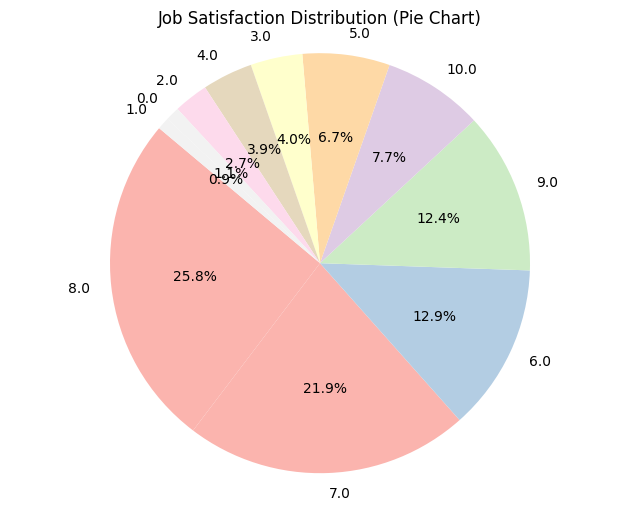

C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_18464\2787673229.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(job_sat_numeric, shade=True, color='skyblue')


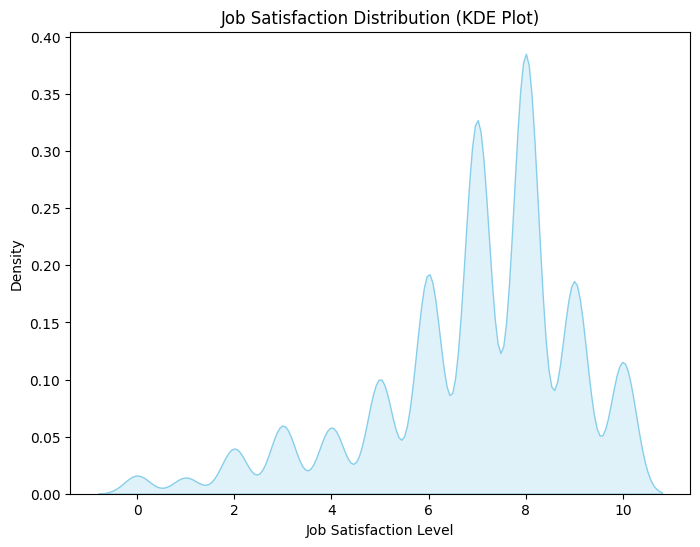

In [6]:
## Write your code here
# Step 5: Visualize Job Satisfaction (JobSat)

# Check if 'JobSat' column exists
if 'JobSat' in df.columns:
    # Prepare data: drop missing values for visualization
    job_sat_data = df['JobSat'].dropna()

    # Pie Chart for Job Satisfaction distribution
    plt.figure(figsize=(8, 6))
    job_sat_counts = job_sat_data.value_counts()
    job_sat_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Pastel1', 
                           ylabel='', title='Job Satisfaction Distribution (Pie Chart)')
    plt.axis('equal')  # Equal aspect ratio ensures pie is circular
    plt.show()

    # KDE Plot for Job Satisfaction (if JobSat is numeric or ordinal)
    # First, check if JobSat can be converted to numeric (e.g., satisfaction levels)
    try:
        job_sat_numeric = pd.to_numeric(job_sat_data, errors='coerce').dropna()
        if not job_sat_numeric.empty:
            plt.figure(figsize=(8, 6))
            sns.kdeplot(job_sat_numeric, shade=True, color='skyblue')
            plt.title('Job Satisfaction Distribution (KDE Plot)')
            plt.xlabel('Job Satisfaction Level')
            plt.ylabel('Density')
            plt.show()
        else:
            print("JobSat column is not numeric; skipping KDE plot.")
    except Exception as e:
        print(f"Error converting JobSat to numeric: {e}")
else:
    print("Column 'JobSat' not found in the dataset.")


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


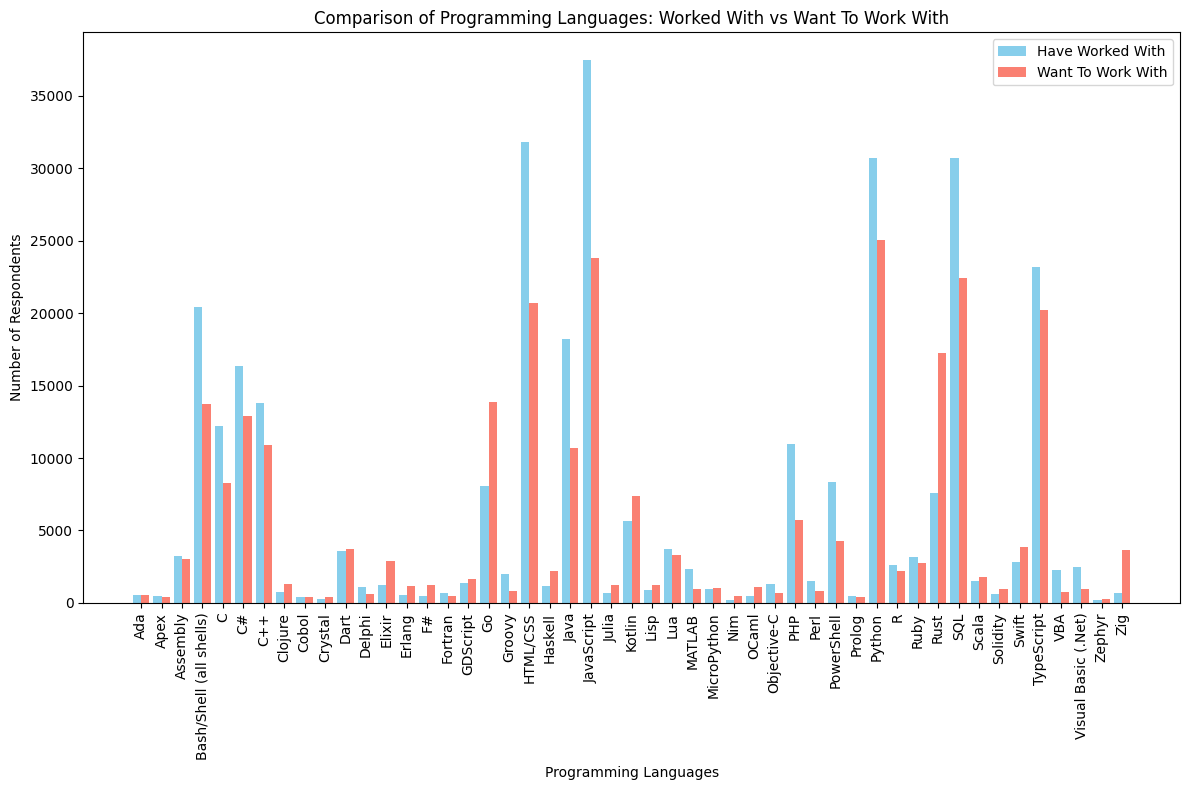

In [7]:
## Write your code here
# %%
# Step 6: Programming Languages Analysis

from collections import Counter

# Check if the required columns exist
cols = ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']
if all(col in df.columns for col in cols):
    # Extract and count languages from 'LanguageHaveWorkedWith'
    worked_langs = df['LanguageHaveWorkedWith'].dropna().str.split(';')
    worked_langs_flat = [lang.strip() for sublist in worked_langs for lang in sublist]
    worked_counts = Counter(worked_langs_flat)

    # Extract and count languages from 'LanguageWantToWorkWith'
    want_langs = df['LanguageWantToWorkWith'].dropna().str.split(';')
    want_langs_flat = [lang.strip() for sublist in want_langs for lang in sublist]
    want_counts = Counter(want_langs_flat)

    # Create DataFrame for comparison
    langs = sorted(set(worked_counts.keys()).union(set(want_counts.keys())))
    lang_data = pd.DataFrame({
        'Language': langs,
        'HaveWorkedWith': [worked_counts.get(lang, 0) for lang in langs],
        'WantToWorkWith': [want_counts.get(lang, 0) for lang in langs]
    })

    # Plot grouped bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.4
    indices = range(len(langs))

    plt.bar(indices, lang_data['HaveWorkedWith'], width=bar_width, label='Have Worked With', color='skyblue')
    plt.bar([i + bar_width for i in indices], lang_data['WantToWorkWith'], width=bar_width, label='Want To Work With', color='salmon')

    plt.xticks([i + bar_width / 2 for i in indices], langs, rotation=90)
    plt.xlabel('Programming Languages')
    plt.ylabel('Number of Respondents')
    plt.title('Comparison of Programming Languages: Worked With vs Want To Work With')
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    missing_cols = [col for col in cols if col not in df.columns]
    print(f"Missing columns in dataset: {missing_cols}")

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


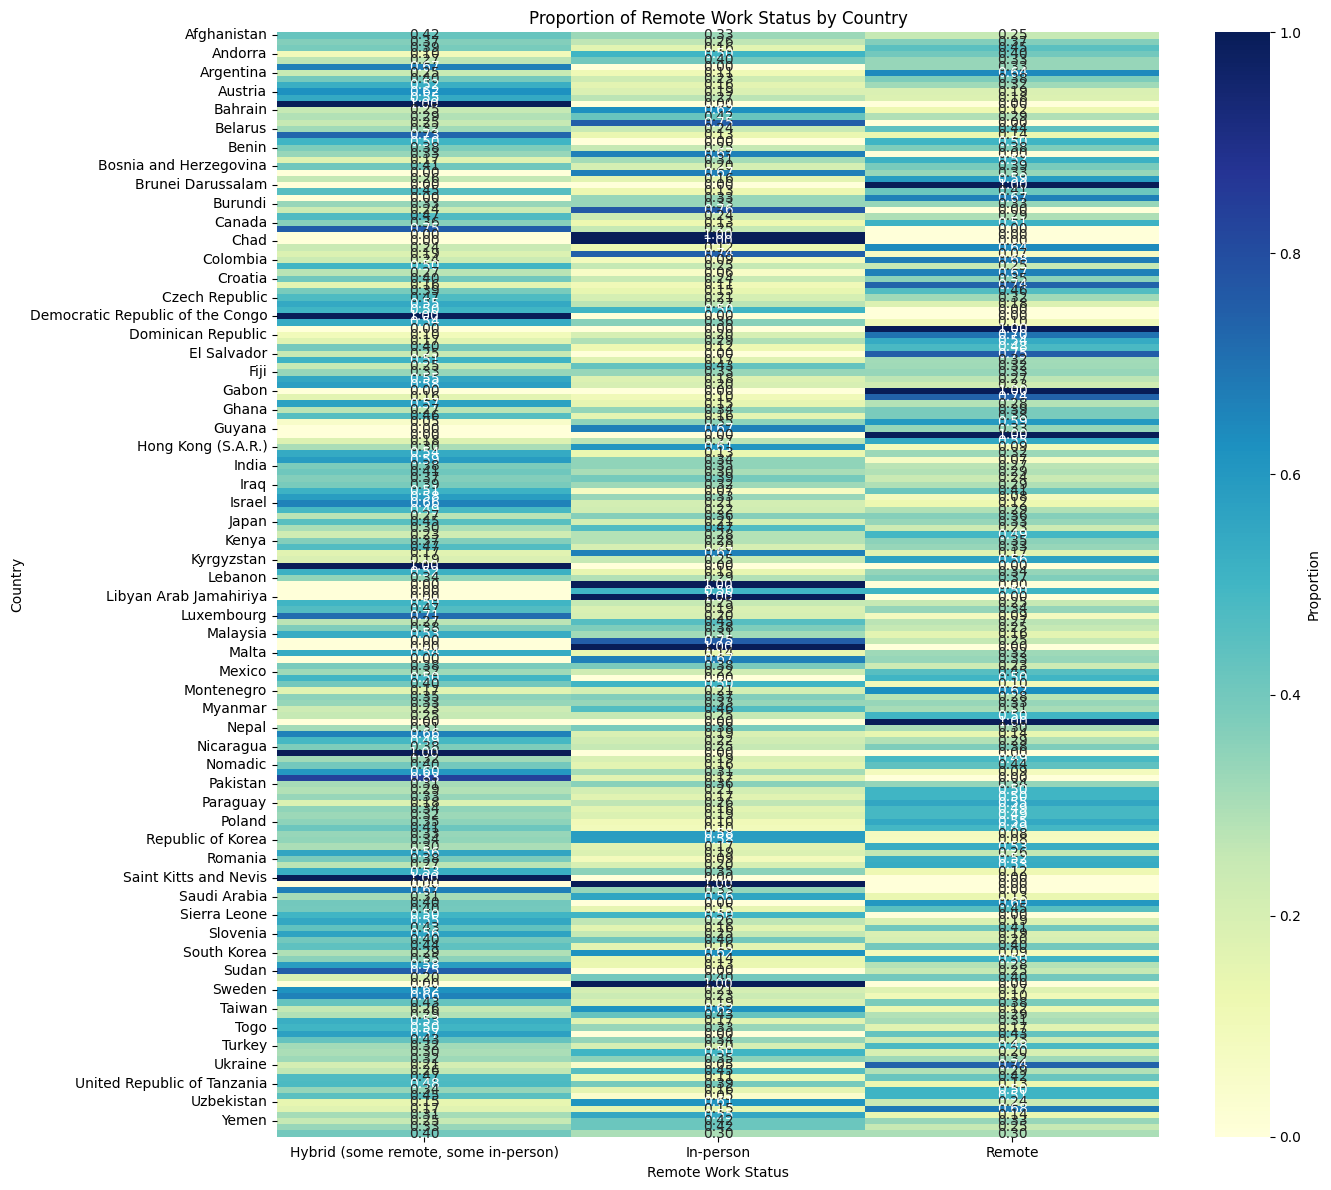

In [8]:
## Write your code here
# %%
import seaborn as sns

# Step 7: Analyze Remote Work Trends by Country using Heatmap

if 'RemoteWork' in df.columns and 'Country' in df.columns:
    # Drop rows with missing values in these columns
    remote_country_data = df[['RemoteWork', 'Country']].dropna()

    # Create a crosstab (frequency table) of RemoteWork by Country
    remote_country_counts = pd.crosstab(remote_country_data['Country'], remote_country_data['RemoteWork'])

    # Normalize counts by row to get proportions (optional)
    remote_country_props = remote_country_counts.div(remote_country_counts.sum(axis=1), axis=0)

    # Plot heatmap of proportions
    plt.figure(figsize=(14, 12))
    sns.heatmap(remote_country_props, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Proportion'})
    plt.title('Proportion of Remote Work Status by Country')
    plt.xlabel('Remote Work Status')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

else:
    missing_cols = [col for col in ['RemoteWork', 'Country'] if col not in df.columns]
    print(f"Missing columns in dataset: {missing_cols}")

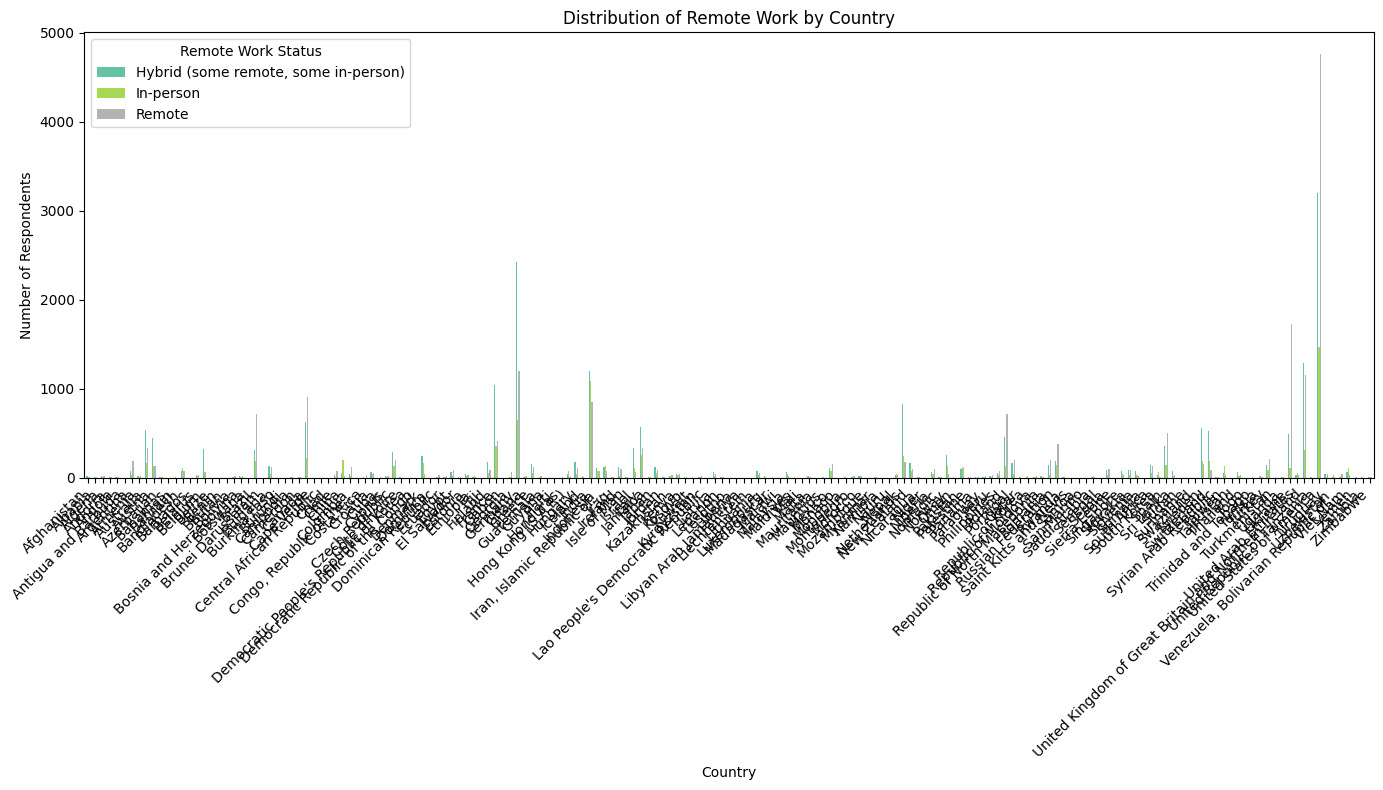

In [9]:
# %%
# Step 7: Analyze Remote Work Trends by Country using Grouped Bar Chart

if 'RemoteWork' in df.columns and 'Country' in df.columns:
    # Drop rows with missing values in these columns
    remote_country_data = df[['RemoteWork', 'Country']].dropna()

    # Create a crosstab (frequency table) of RemoteWork by Country
    remote_country_counts = pd.crosstab(remote_country_data['Country'], remote_country_data['RemoteWork'])

    # Plot grouped bar chart
    remote_country_counts.plot(kind='bar', figsize=(14, 8), colormap='Set2')

    plt.title('Distribution of Remote Work by Country')
    plt.xlabel('Country')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Remote Work Status')
    plt.tight_layout()
    plt.show()

else:
    missing_cols = [col for col in ['RemoteWork', 'Country'] if col not in df.columns]
    print(f"Missing columns in dataset: {missing_cols}")

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [10]:
## Write your code here
# %%
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Convert 'YearsCodePro' and 'JobSat' to numeric (coerce errors to NaN)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Drop rows where either is NaN
data = df[['JobSat', 'YearsCodePro']].dropna()

# Calculate Pearson correlation and p-value
pearson_corr, pearson_p = pearsonr(data['YearsCodePro'], data['JobSat'])

# Calculate Spearman correlation and p-value
spearman_corr, spearman_p = spearmanr(data['YearsCodePro'], data['JobSat'])

print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")

Pearson correlation: 0.1033650089907376, p-value: 2.3265929665481642e-66
Spearman correlation: 0.12068519828581024, p-value: 5.94335574963238e-90


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

C:\Users\liyana_bh\AppData\Local\Temp\ipykernel_18464\3113451913.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


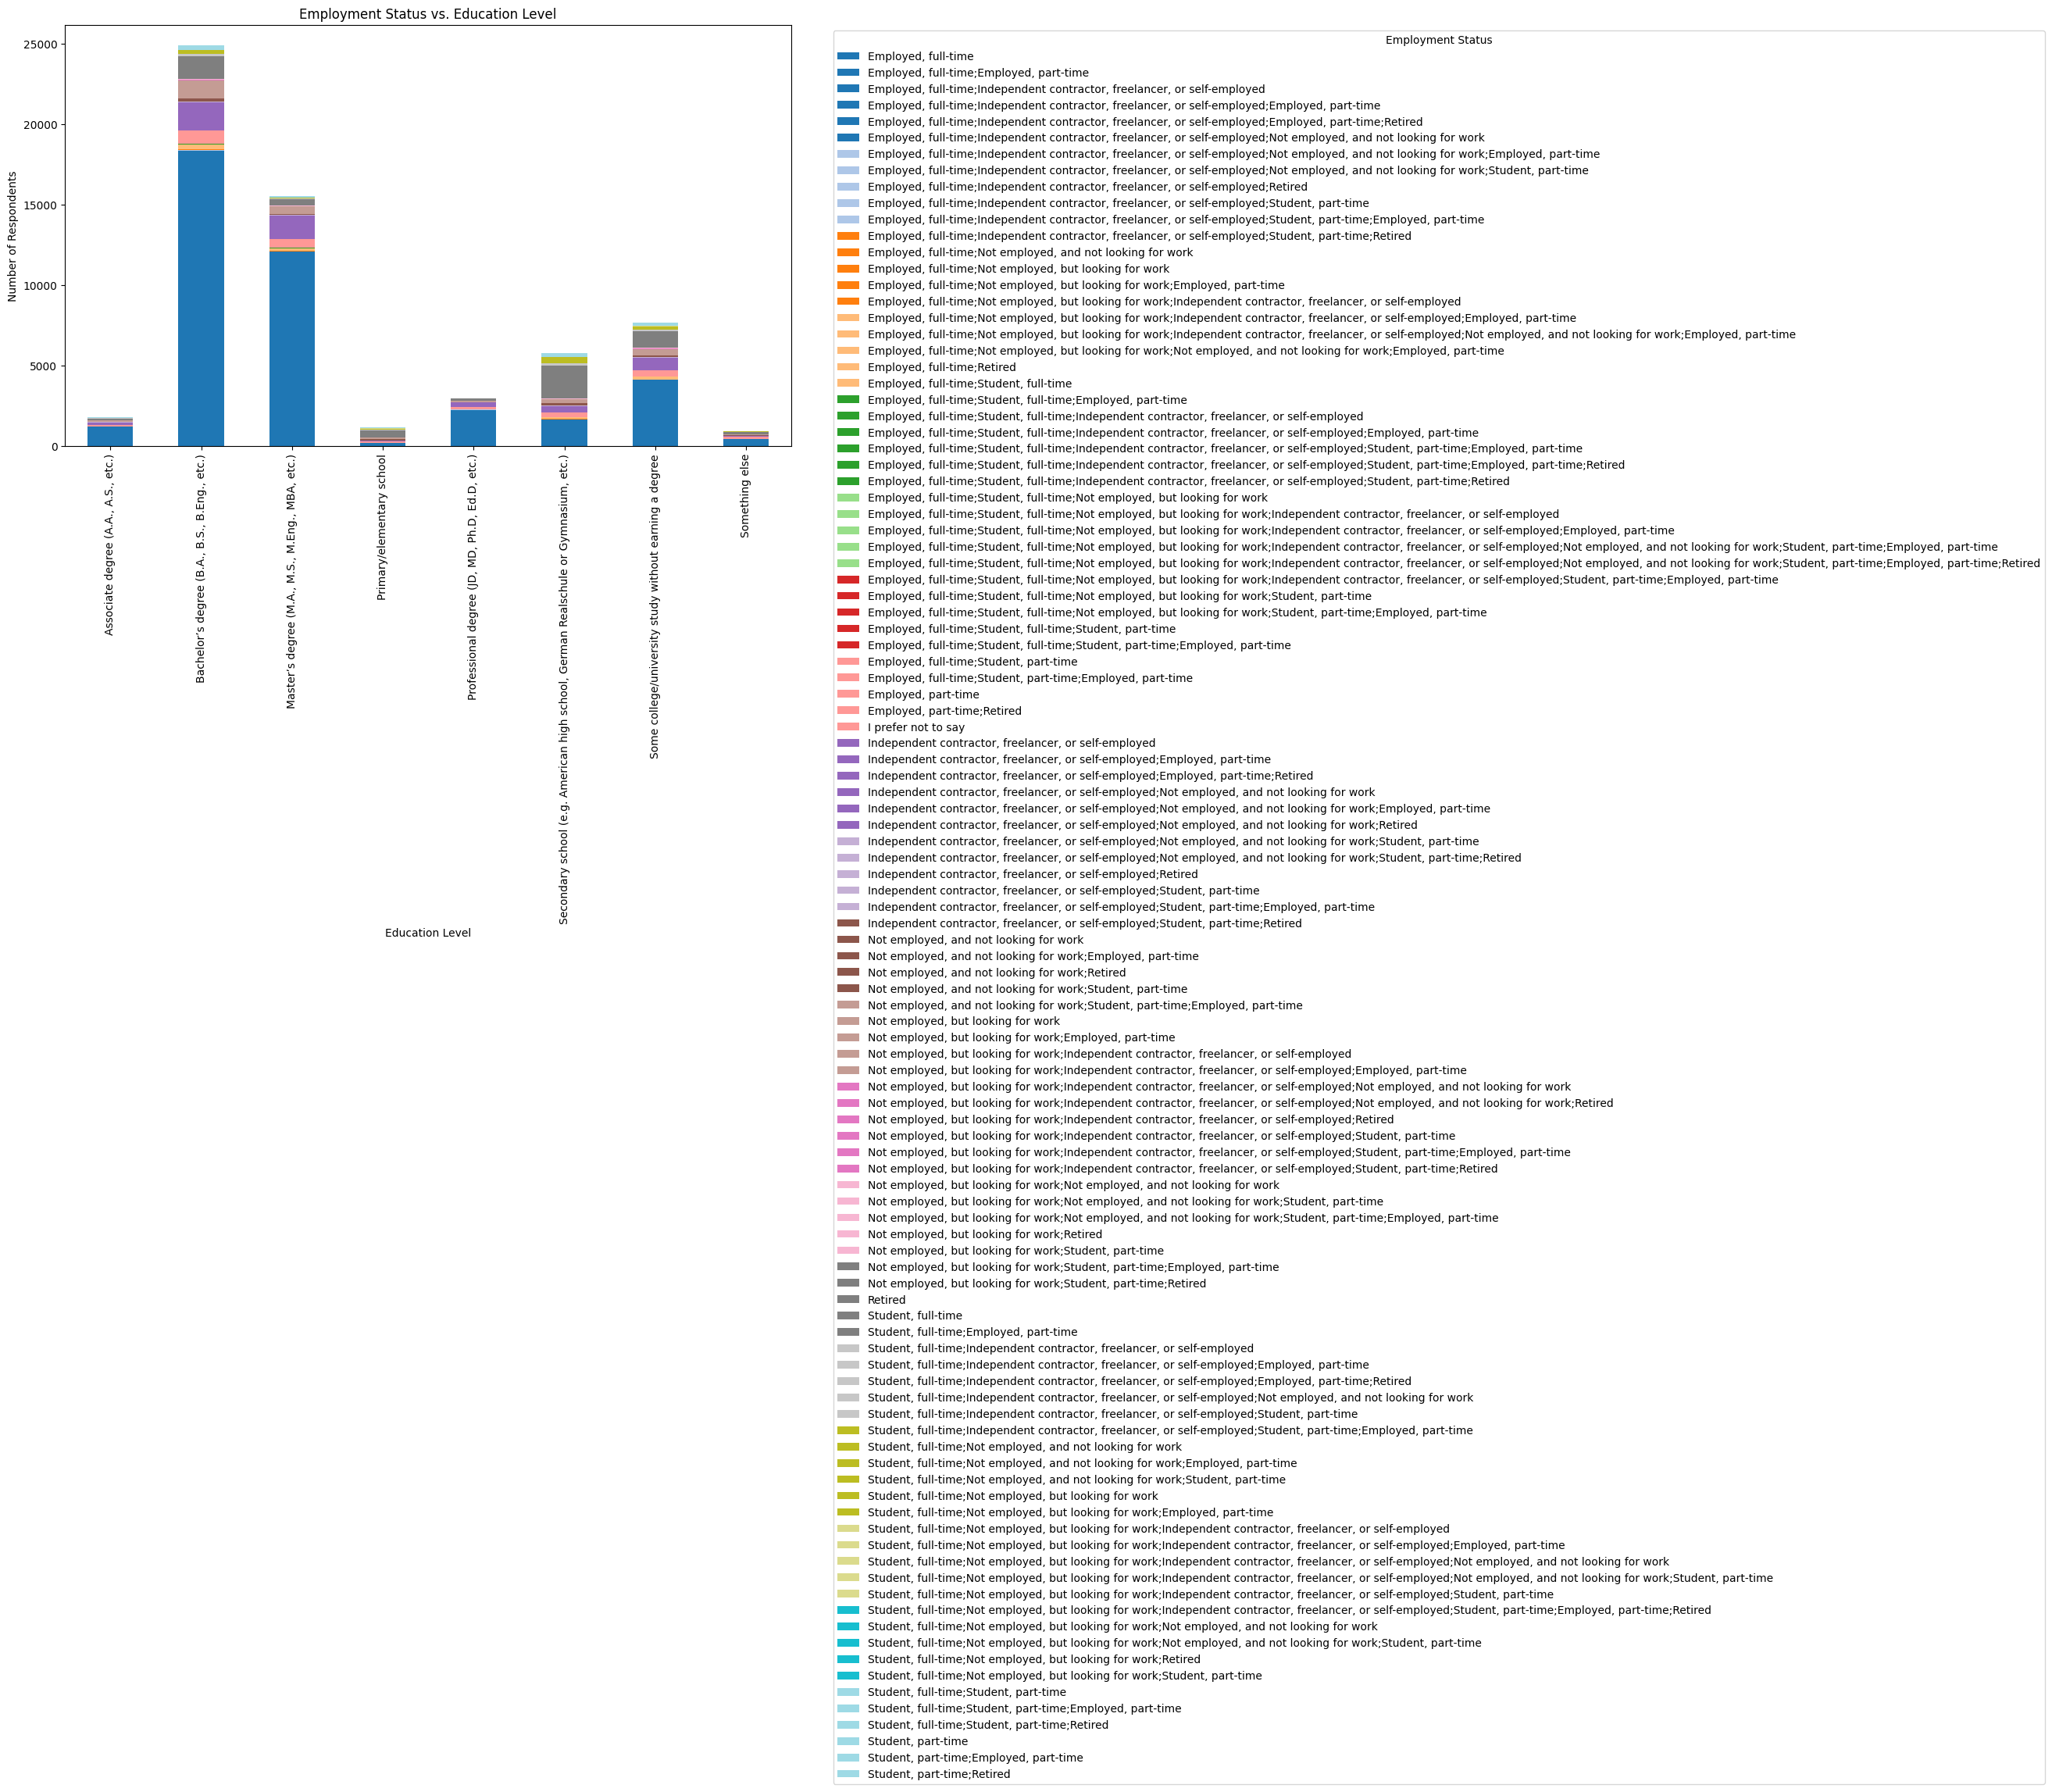

In [11]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Step 9: Cross-tabulation Analysis (Employment vs. Education Level)

# Cross-tabulation of Employment and EdLevel
cross_tab = pd.crosstab(df['EdLevel'], df['Employment'])

# Display the cross-tabulation table
print(cross_tab)

# Plotting the cross-tabulation as a stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

# Adding titles and labels
plt.title('Employment Status vs. Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [12]:
## Write your code here
# Step 10: Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [13]:
import os
print(os.getcwd()) 

c:\Users\liyana_bh\Downloads


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
